# Part 1
Implementing and evaluating two models to classify the Fashion MNIST dataset using the Keras Sequential API.

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

# For the confusion matrix
from sklearn.metrics import confusion_matrix

In [0]:
# loading the dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# adding columns names accordingly 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# normalizing pixel values
train_images = train_images / 255.0

test_images = test_images / 255.0

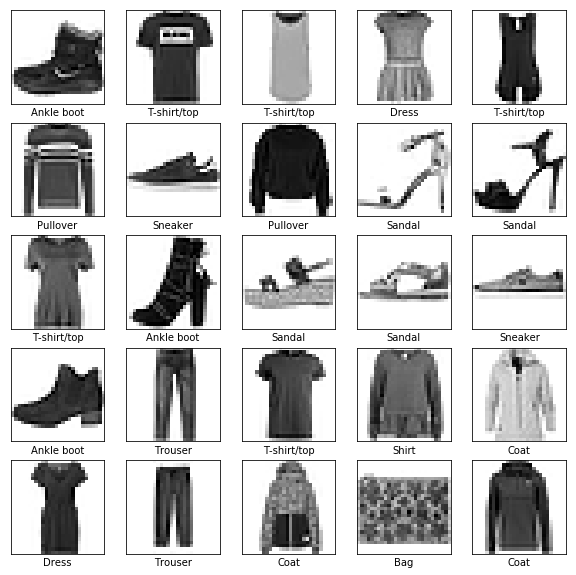

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 1. Implementing a linear model on the fashion MNIST dataset.

In [0]:
# setting up a linear model
linear_model = Sequential([
Flatten(input_shape=(28, 28)),
Dense(10, 'softmax')
])

In [0]:
# compiling the model
linear_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# training the model
process = linear_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20)
# specififcally choosing a lot of epochs for the graph to be nicely populated

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5938 - acc: 0.8002 - val_loss: 0.5085 - val_acc: 0.8264
Epoch 2/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4615 - acc: 0.8422 - val_loss: 0.4729 - val_acc: 0.8361
Epoch 3/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4345 - acc: 0.8514 - val_loss: 0.4674 - val_acc: 0.8381
Epoch 4/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4234 - acc: 0.8536 - val_loss: 0.4617 - val_acc: 0.8394
Epoch 5/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4125 - acc: 0.8565 - val_loss: 0.4524 - val_acc: 0.8408
Epoch 6/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4071 - acc: 0.8591 - val_loss: 0.4506 - val_acc: 0.8421
Epoch 7/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4011 - acc: 0.8606 - val_loss: 0.

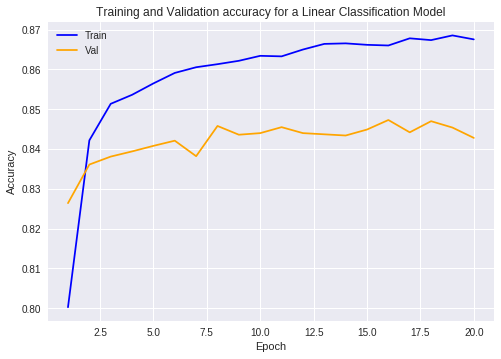

In [0]:
# produce plot to compare trainig and validation accuracies
acc = process.history['acc']
val_acc = process.history['val_acc']
loss = process.history['loss']
val_loss = process.history['val_loss']

# Get the number of epochs
epochs = range(1, len(acc)+1)

plt.title('Training and Validation accuracy for a Linear Classification Model')
plt.plot(epochs, acc[:20], color='blue', label='Train')
plt.plot(epochs, val_acc[:20], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph above shows that the linear model reaches around ~84% test accuracy. The model starts to overfit pretty much right after the first epoch (intersection between train and test accuracy plots).

## 2. Implementing a deep neural network model on the fashion MNIST dataset.

In [0]:
# setting up the layers
dnn_model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(512, 'relu'),
  Dense(128, 'relu'),
  Dense(128, 'relu'),
  Dense(10, 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# compiling the model
dnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# training the model
process2 = dnn_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 295us/sample - loss: 0.4874 - acc: 0.8230 - val_loss: 0.4305 - val_acc: 0.8486
Epoch 2/10
60000/60000 [==============================] - 17s 285us/sample - loss: 0.3643 - acc: 0.8654 - val_loss: 0.3755 - val_acc: 0.8633
Epoch 3/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.3280 - acc: 0.8782 - val_loss: 0.4081 - val_acc: 0.8422
Epoch 4/10
60000/60000 [==============================] - 17s 287us/sample - loss: 0.3042 - acc: 0.8863 - val_loss: 0.4055 - val_acc: 0.8591
Epoch 5/10
60000/60000 [==============================] - 17s 279us/sample - loss: 0.2850 - acc: 0.8936 - val_loss: 0.3499 - val_acc: 0.8732
Epoch 6/10
60000/60000 [==============================] - 17s 280us/sample - loss: 0.2729 - acc: 0.8973 - val_loss: 0.3361 - val_acc: 0.8788
Epoch 7/10
60000/60000 [==============================] - 17s 282us/sample - loss: 0.2591 - acc: 0.9026 

In [0]:
# evaluating the performance on the test dataset
test_loss, test_acc = dnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.3300 - acc: 0.8848
Test accuracy: 0.8848


** The test accuracy ends up being ~89% **

In [0]:
predictions = dnn_model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

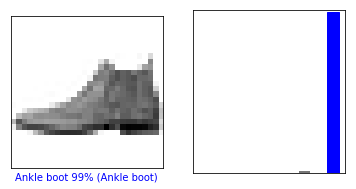

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

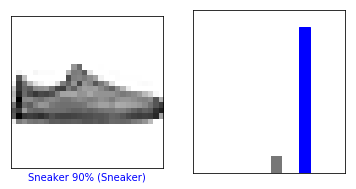

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

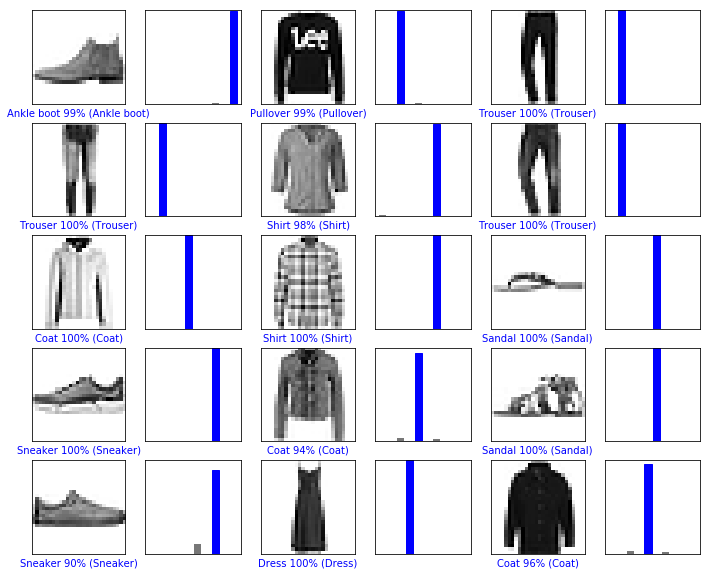

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## 3. Produce a diagram that visualizes your linear and deep models using plot_model.

In [0]:
linear_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


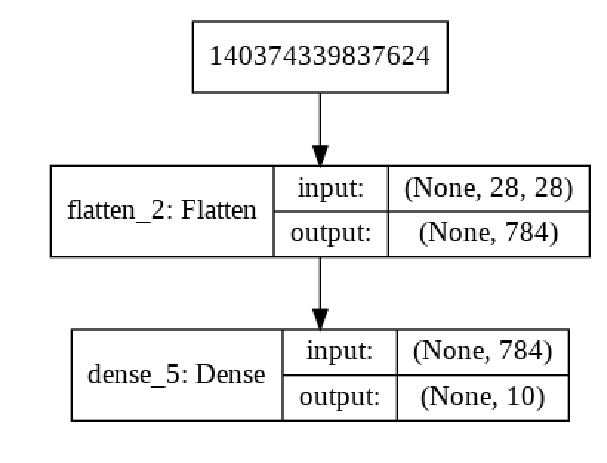

In [0]:
image_path = 'model.png'
keras.utils.plot_model(linear_model, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=100)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.show()

In [0]:
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 485,386
Trainable params: 485,386
Non-trainable params: 0
_________________________________________________________________


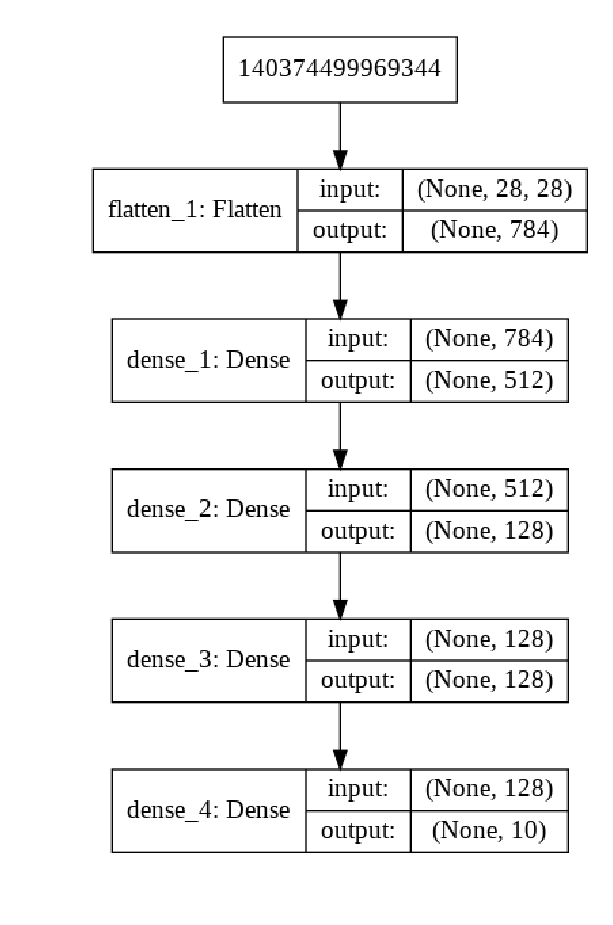

In [0]:
image_path = 'model_two.png'
keras.utils.plot_model(dnn_model, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=200)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.show()

## 4. Produce a confusion matrix for one of your models.

In [0]:
# taken from sklearn officially documentation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
# Compute confusion matrix for DNN
predictions = dnn_model.predict(test_images)
pred_labels = []
for arr in predictions:
  pred_labels.append(np.argmax(arr))
                     
conf_matrix = confusion_matrix(test_labels, pred_labels)
np.set_printoptions(precision=2)

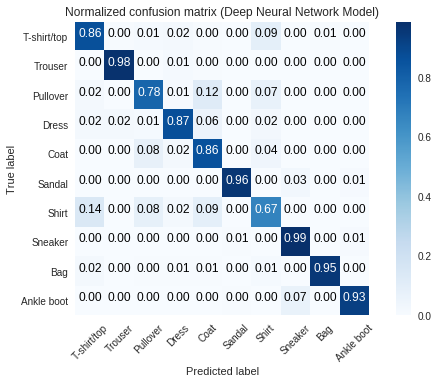

In [0]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (Deep Neural Network Model)')

plt.show()

In [0]:
# Compute confusion matrix for linear model
predictions_linear = linear_model.predict(test_images)
pred_labels_linear = []
for arr in predictions_linear:
  pred_labels_linear.append(np.argmax(arr))
                     
conf_matrix_linear = confusion_matrix(test_labels, pred_labels_linear)
np.set_printoptions(precision=2)

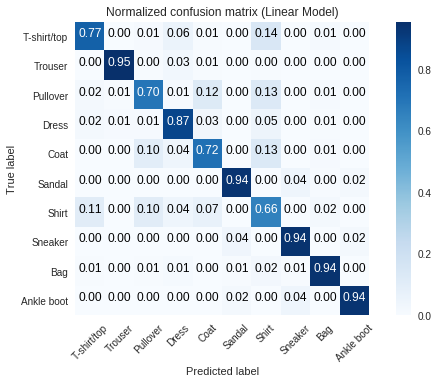

In [0]:
# Plot normalized confusion matrix for linear model
plt.figure()
plot_confusion_matrix(conf_matrix_linear, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (Linear Model)')

plt.show()

# Part 2
Implementing and evaluating two models to classify the Fashion MNIST dataset using the Keras Subclassing API.

** Need to restart the kernel for the whole notebook to run properly **

In [0]:
# setting up tensorflow 2.0
!pip install tf-nightly-2.0-preview

    100% |████████████████████████████████| 78.7MB 339kB/s 
    100% |████████████████████████████████| 61kB 22.2MB/s 
    100% |████████████████████████████████| 358kB 16.6MB/s 
    100% |████████████████████████████████| 3.2MB 11.2MB/s 


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
print("You have version", tf.__version__)
assert tf.__version__ >= "2.0" # TensorFlow ≥ 2.0 required

Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation
You have version 2.0.0-dev20190214


In [0]:
import numpy as np

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten

In [0]:
# loading the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

32768/29515=================================] - 0s 0us/step
26427392/26421880==============================] - 0s 0us/step
8192/5148===============================================] - 0s 0us/step
4423680/4422102==============================] - 0s 0us/step


In [0]:
BATCH_SIZE = 128
BUFFER_SIZE = len(x_train)

mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

## 5. Training a linear model to classify this dataset.

In [0]:
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
  
linear_model = LinearModel()

In [0]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
linear_optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(images, labels, optimizer, model):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:
def test_step(images, labels, model):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)


In [0]:
EPOCHS = 20
train_accuracy= []
test_accuracy = []

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels, linear_optimizer, linear_model)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels, linear_model)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))
  train_accuracy.append(train_accuracy_metric.result() * 100)
  test_accuracy.append(test_accuracy_metric.result() * 100)

Epoch 1, Loss: 0.7298, Accuracy: 75.79, Test loss: 0.5679, Test accuracy: 81.04
Epoch 2, Loss: 0.6219, Accuracy: 79.32, Test loss: 0.5400, Test accuracy: 81.73
Epoch 3, Loss: 0.5723, Accuracy: 80.91, Test loss: 0.5228, Test accuracy: 82.28
Epoch 4, Loss: 0.5420, Accuracy: 81.86, Test loss: 0.5110, Test accuracy: 82.63
Epoch 5, Loss: 0.5211, Accuracy: 82.52, Test loss: 0.5022, Test accuracy: 82.87
Epoch 6, Loss: 0.5055, Accuracy: 83.00, Test loss: 0.4953, Test accuracy: 83.05
Epoch 7, Loss: 0.4934, Accuracy: 83.38, Test loss: 0.4898, Test accuracy: 83.20
Epoch 8, Loss: 0.4835, Accuracy: 83.69, Test loss: 0.4853, Test accuracy: 83.32
Epoch 9, Loss: 0.4752, Accuracy: 83.95, Test loss: 0.4815, Test accuracy: 83.42
Epoch 10, Loss: 0.4682, Accuracy: 84.16, Test loss: 0.4782, Test accuracy: 83.51
Epoch 11, Loss: 0.4622, Accuracy: 84.35, Test loss: 0.4754, Test accuracy: 83.59
Epoch 12, Loss: 0.4569, Accuracy: 84.51, Test loss: 0.4729, Test accuracy: 83.66
Epoch 13, Loss: 0.4522, Accuracy: 84.

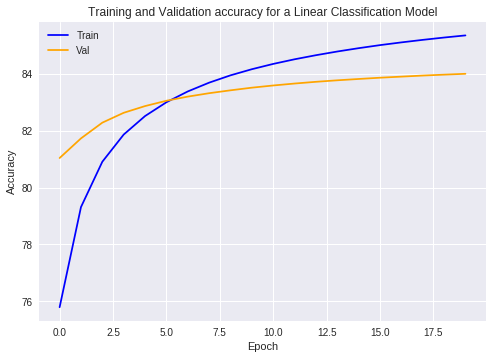

In [0]:
# plotting the results
# Get the number of epochs
epochs = range(EPOCHS)

plt.title('Training and Validation accuracy for a Linear Classification Model')
plt.plot(epochs, train_accuracy, color='blue', label='Train')
plt.plot(epochs, test_accuracy, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Same story as in part 1. Nonetheless, now it takes more epochs for the two plots to meet. The test accuracy does concentrate around 84%.

## 6. Training a deep model to classify this dataset.

In [0]:
class DeepModel(Model):
  def __init__(self):
    super(DeepModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(512, activation='relu')
    self.d2 = Dense(128, activation='relu')
    self.d3 = Dense(128, activation='relu')
    self.d4 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    return self.d4(x)
  
deep_model = DeepModel()

In [0]:
deep_optimizer = tf.keras.optimizers.Adam()

In [0]:
EPOCHS = 20

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels, deep_optimizer, deep_model)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels, deep_model)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))

Epoch 1, Loss: 0.5089, Accuracy: 81.91, Test loss: 0.4395, Test accuracy: 84.04
Epoch 2, Loss: 0.4357, Accuracy: 84.33, Test loss: 0.4200, Test accuracy: 84.79
Epoch 3, Loss: 0.3985, Accuracy: 85.58, Test loss: 0.4077, Test accuracy: 85.17
Epoch 4, Loss: 0.3739, Accuracy: 86.40, Test loss: 0.4038, Test accuracy: 85.34
Epoch 5, Loss: 0.3553, Accuracy: 87.03, Test loss: 0.3966, Test accuracy: 85.61
Epoch 6, Loss: 0.3404, Accuracy: 87.52, Test loss: 0.3925, Test accuracy: 85.78
Epoch 7, Loss: 0.3279, Accuracy: 87.95, Test loss: 0.3879, Test accuracy: 85.97
Epoch 8, Loss: 0.3169, Accuracy: 88.31, Test loss: 0.3845, Test accuracy: 86.11
Epoch 9, Loss: 0.3076, Accuracy: 88.62, Test loss: 0.3822, Test accuracy: 86.24
Epoch 10, Loss: 0.2993, Accuracy: 88.91, Test loss: 0.3813, Test accuracy: 86.37
Epoch 11, Loss: 0.2913, Accuracy: 89.18, Test loss: 0.3844, Test accuracy: 86.37
Epoch 12, Loss: 0.2840, Accuracy: 89.44, Test loss: 0.3833, Test accuracy: 86.52
Epoch 13, Loss: 0.2773, Accuracy: 89.

** The test accuracy for this approach is around ~87% **

# Code sources used

1. https://www.tensorflow.org/tutorials/keras/basic_classification
2. https://github.com/random-forests/applied-dl/blob/master/examples/2.2-hello-subclassing.ipynb
3. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
4. https://colab.research.google.com/drive/1-DJ38NI9CUG0tuM2D6ePzH9nqRtz2t3c
5. https://github.com/random-forests/applied-dl/blob/master/examples/2.2-hello-subclassing.ipynb